<a href="https://colab.research.google.com/github/tinaghimire/data-mining/blob/main/Lab-3_Naive_Bayes/Census_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/fuse/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.duplicated().sum()

24

In [ ]:
for col in df.columns:
    specific_value_count = (df[col] == '?').sum() / len(df) * 100
    print(f"{col}: {specific_value_count}")

age: 0.0
workclass: 5.638647461687294
fnlwgt: 0.0
education: 0.0
education.num: 0.0
marital.status: 0.0
occupation: 5.660145572924664
relationship: 0.0
race: 0.0
sex: 0.0
capital.gain: 0.0
capital.loss: 0.0
hours.per.week: 0.0
native.country: 1.7904855501980899
income: 0.0


In [ ]:
df['capital.gain'].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
count = df['income'].value_counts()
count = pd.DataFrame(count)
count

,count
income,
<=50K,24720
>50K,7841


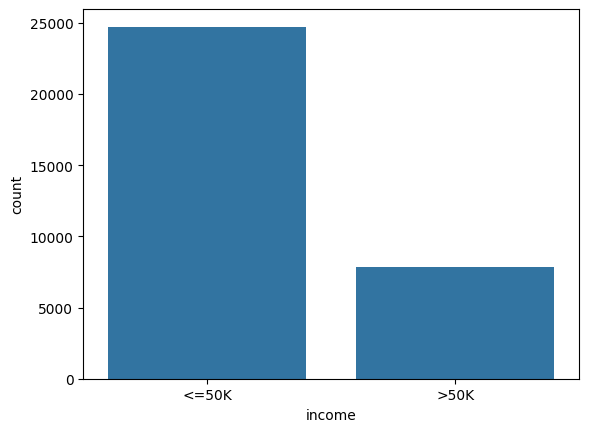

In [ ]:
sns.countplot(data=df, x='income')
plt.show()

In [ ]:
count = df.groupby('sex')['income'].value_counts()
count / len(df) * 100

sex     income
Female  <=50K     29.458555
        >50K       3.620896
Male    <=50K     46.460490
        >50K      20.460060
Name: count, dtype: float64

In [ ]:
# df['income_>50k_1'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
# df.head()

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['income_>50k_2'] = label_encoder.fit_transform(df['income'])
# df.head()

In [ ]:
# df['income_>50k_1'].value_counts(), df['income_>50k_2'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['income_>50k'] = label_encoder.fit_transform(df['income'])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_>50k
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [ ]:
df.drop('income', axis=1)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_>50k
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [ ]:
count = pd.pivot_table(df, values='income_>50k', index='marital.status', columns='sex', aggfunc="mean")
count

sex,Female,Male
marital.status,,
Divorced,0.066991,0.160361
Married-AF-spouse,0.428571,0.444444
Married-civ-spouse,0.455039,0.445829
Married-spouse-absent,0.053659,0.107981
Never-married,0.034823,0.054936
Separated,0.026941,0.124365
Widowed,0.055758,0.232143


In [ ]:
import matplotlib.pyplot as plt

<Figure size 1500x600 with 0 Axes>

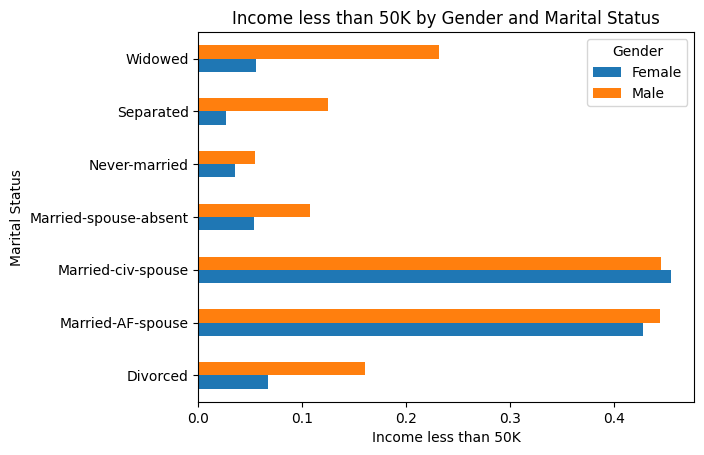

In [ ]:
plt.figure(figsize=(15, 6))
count.plot.barh()
plt.title('Income less than 50K by Gender and Marital Status')
plt.xlabel('Income less than 50K')
plt.ylabel('Marital Status')
plt.legend(title='Gender')
plt.show()

In [ ]:
df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

# Imputing missing values


In [ ]:
# df.isnull().sum()

for col in df.columns:
    specific_value_count = (df[col] == '?').sum()
    print(f"{col}: {specific_value_count}")

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education.num: 0
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital.gain: 0
capital.loss: 0
hours.per.week: 0
native.country: 583
income: 0
income_>50k: 0


In [ ]:
# df['Age'] = df['Age'].fillna(round(np.mean(df['Age'])))
df[['workclass', 'occupation', 'native.country']] = df[['workclass', 'occupation', 'native.country']].replace('?', np.nan)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
income_>50k          0
dtype: int64

In [ ]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_>50k
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
income_>50k       0
dtype: int64

# Handling Outliers


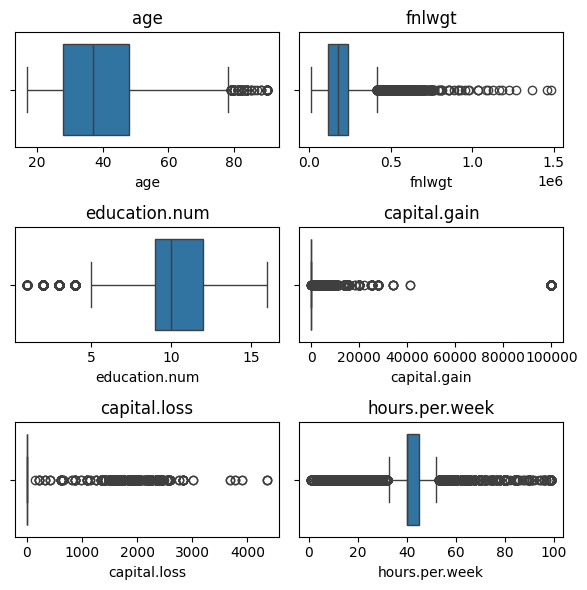

In [ ]:
numerical_columns = df.drop('income_>50k', axis=1).select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed for the subplots
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 6))

# Flatten the axes array
axes = axes.flatten()

# Plot the boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound, upper_bound)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = df.copy()
for col in numerical_columns:
    df_cleaned = remove_outliers(df_cleaned, col)

-2.0 78.0
-61341.625 416507.375
4.5 16.5
0.0 0.0
0.0 0.0
32.5 52.5


In [ ]:
df_cleaned.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_>50k
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
4237,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1


In [ ]:
df.shape, df_cleaned.shape

((32561, 16), (19004, 16))

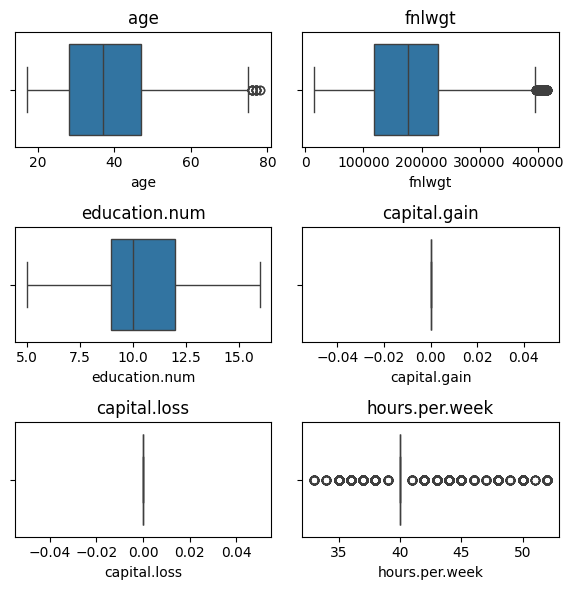

In [ ]:

# Calculate the number of rows needed for the subplots
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6, 6))

# Flatten the axes array
axes = axes.flatten()

# Plot the boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df = df_cleaned.drop(['capital.gain', 'capital.loss', 'income'], axis =1)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income_>50k
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
4237,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1


In [ ]:
df.shape # from 819 to 718

(19004, 13)

# Handling Imbalanced Classes

In [ ]:
df['income_>50k'].value_counts()
count_1 = df[df['income_>50k'] == 1]
count_0 = df[df['income_>50k'] == 0]
count_1.shape, count_0.shape

((4022, 13), (14982, 13))

In [ ]:
from sklearn.utils import resample

income_more = df[df['income_>50k'] == 1]
income_less = df[df['income_>50k'] == 0]

up_sampled_income_more = resample(income_more, n_samples=len(income_less), replace=True)
up_sampled_df = pd.concat([income_less, up_sampled_income_more])
up_sampled_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income_>50k
4232,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
4233,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4234,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
4235,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
4241,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,50,United-States,0


In [ ]:
from collections import Counter

original_class_counts = Counter(df['income_>50k'])
resampled_class_counts = Counter(up_sampled_df['income_>50k'])
original_class_counts, resampled_class_counts

(Counter({0: 14982, 1: 4022}), Counter({0: 14982, 1: 14982}))

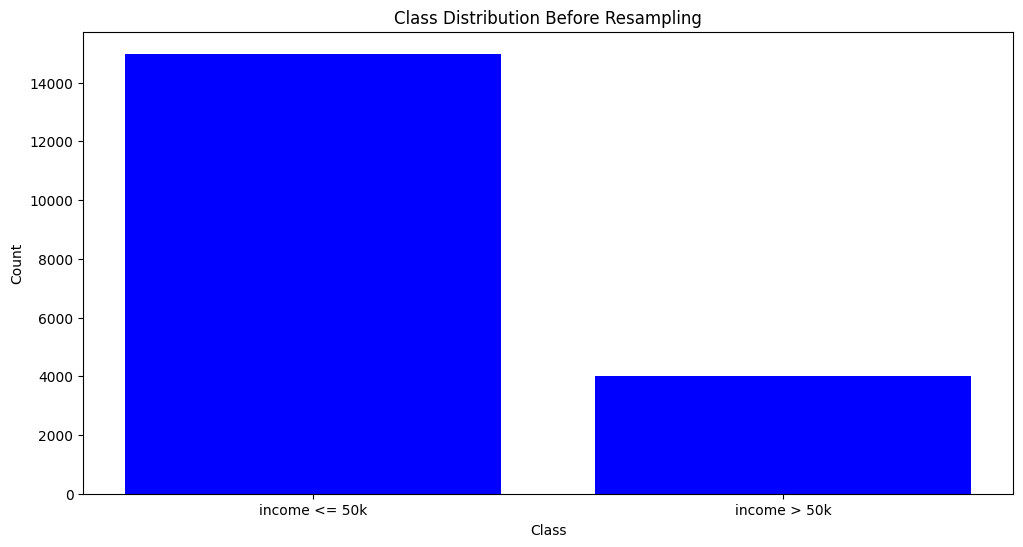

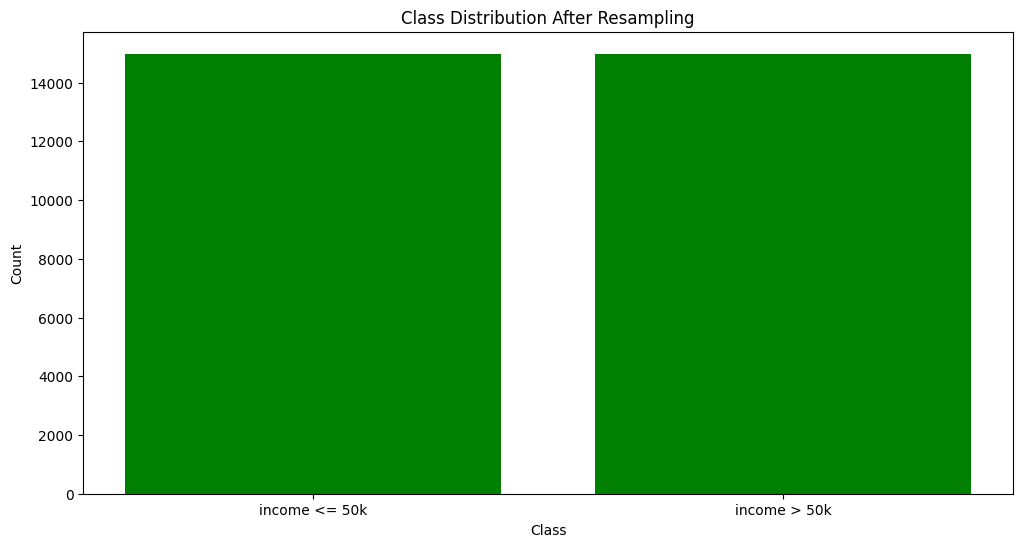

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot before resampling
plt.bar(original_class_counts.keys(), original_class_counts.values(), color='blue')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['income <= 50k', 'income > 50k'])
plt.show()

# Plot after resampling
plt.figure(figsize=(12, 6))

plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='green')
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['income <= 50k', 'income > 50k'])
plt.show()

In [ ]:
up_sampled_df['income_>50k'].value_counts()

income_>50k
0    14982
1    14982
Name: count, dtype: int64

In [ ]:
# df = up_sampled_df
# df.head()

In [ ]:
df.shape

(19004, 13)

# Label encoding for Categorical data

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income_>50k
4232,38,3,215646,8,9,0,5,1,4,1,40,37,0
4233,53,3,234721,1,7,2,5,0,2,1,40,37,0
4234,28,3,338409,6,13,2,9,5,2,0,40,4,0
4235,37,3,284582,9,14,2,3,5,4,0,40,37,0
4237,52,5,209642,8,9,2,3,0,4,1,45,37,1


# Feature Selection

In [ ]:
X = df.drop('income_>50k', axis=1)
y = df['income_>50k']

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X, y)

feature_importance = elastic_net.coef_

selected_features = X.columns[elastic_net.coef_ != 0].tolist()

print(f"Selected features based on ElasticNet: {selected_features}")
print(len(selected_features))

Selected features based on ElasticNet: ['age', 'fnlwgt', 'hours.per.week']
3


In [ ]:
df = df[selected_features]
df.head()

,age,fnlwgt,hours.per.week
4232,38,215646,40
4233,53,234721,40
4234,28,338409,40
4235,37,284582,40
4237,52,209642,45


In [ ]:
df.describe()

,age,fnlwgt,hours.per.week
count,19004.000000,19004.000000,19004.000000
mean,38.049095,180729.746369,41.470690
std,12.025270,87103.790068,3.950176
min,17.000000,14878.000000,33.000000
25%,28.000000,117500.500000,40.000000
50%,37.000000,176839.000000,40.000000
75%,47.000000,228972.250000,40.000000
max,78.000000,416415.000000,52.000000


<Axes: >

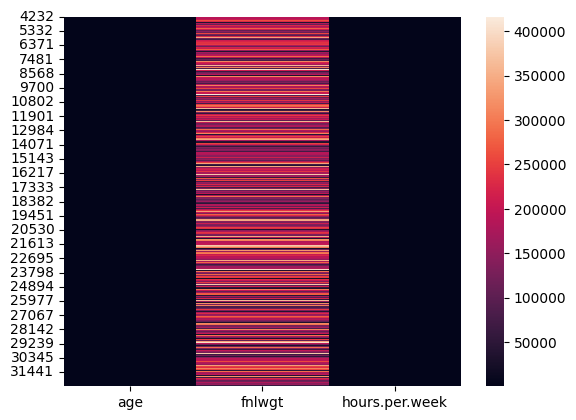

In [ ]:
sns.heatmap(df)

# Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((15203, 12), (3801, 12))

# Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test[0:10])
y_pred, y_test[0:10]

(array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 7061     0
 23778    0
 8576     1
 8638     0
 19711    1
 22711    0
 15795    1
 27503    0
 31950    0
 17370    0
 Name: income_>50k, dtype: int64)

In [ ]:
y_prob = gnb.predict_proba(X_test[0:10])
y_prob

array([[0.98306969, 0.01693031],
       [0.0954429 , 0.9045571 ],
       [0.06838681, 0.93161319],
       [0.98398627, 0.01601373],
       [0.56562089, 0.43437911],
       [0.83380165, 0.16619835],
       [0.19833329, 0.80166671],
       [0.86294824, 0.13705176],
       [0.98350686, 0.01649314],
       [0.99591214, 0.00408786]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[2511,  508],
       [ 256,  526]])

Text(50.722222222222214, 0.5, 'True Labels')

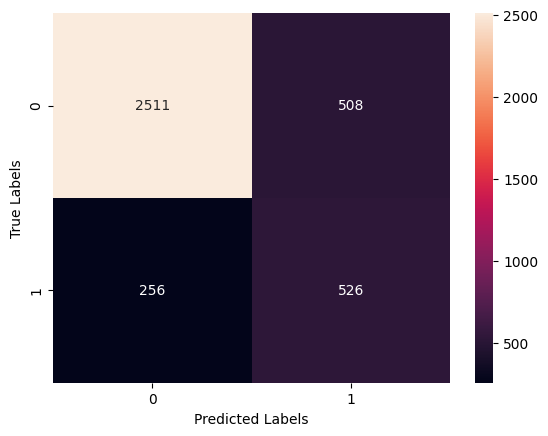

In [ ]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, gnb.predict(X_test))
ax = sns.heatmap(con_matrix, annot=True, fmt='d', xticklabels = y.unique(), yticklabels = y.unique())
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
class_report = classification_report(y_test, gnb.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3019
           1       0.51      0.67      0.58       782

    accuracy                           0.80      3801
   macro avg       0.71      0.75      0.72      3801
weighted avg       0.83      0.80      0.81      3801



In [ ]:
from sklearn.naive_bayes import CategoricalNB

# Categorical Naive Bayes

In [ ]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
4232,38,3,215646,8,9,0,5,1,4,1,40,37
4233,53,3,234721,1,7,2,5,0,2,1,40,37
4234,28,3,338409,6,13,2,9,5,2,0,40,4
4235,37,3,284582,9,14,2,3,5,4,0,40,37
4237,52,5,209642,8,9,2,3,0,4,1,45,37


In [ ]:
# X['Age'] = pd.cut(X['Age'], bins=5, labels=False)
# X['Fare'] = pd.cut(X['Fare'], bins=5, labels=False)
# X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gnb = CategoricalNB()
gnb.fit(X_train, y_train)

CategoricalNB()

In [ ]:
y_pred = gnb.predict(X_test[0:10])
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
y_prob = gnb.predict_proba(X_test[0:10])
y_prob

array([[9.48875558e-01, 5.11244424e-02],
       [1.07630057e-01, 8.92369943e-01],
       [2.50400783e-02, 9.74959922e-01],
       [9.28302259e-01, 7.16977412e-02],
       [3.14194626e-01, 6.85805374e-01],
       [9.94265112e-01, 5.73488839e-03],
       [1.76971954e-01, 8.23028046e-01],
       [6.16423083e-01, 3.83576917e-01],
       [9.99678401e-01, 3.21599074e-04],
       [9.99995952e-01, 4.04763201e-06]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, gnb.predict(X_test))

array([[2573,  446],
       [ 232,  550]])

Text(50.722222222222214, 0.5, 'True Labels')

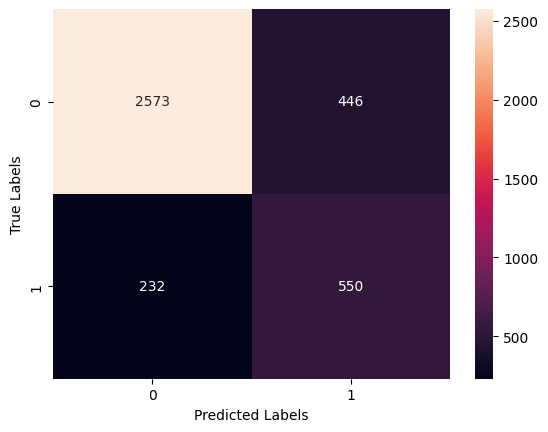

In [ ]:
# Confusion matrix
con_matrix = confusion_matrix(y_test, gnb.predict(X_test))
ax = sns.heatmap(con_matrix, annot=True, fmt='d', xticklabels = y.unique(), yticklabels = y.unique())
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

In [ ]:
class_report = classification_report(y_test, gnb.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      3019
           1       0.55      0.70      0.62       782

    accuracy                           0.82      3801
   macro avg       0.73      0.78      0.75      3801
weighted avg       0.84      0.82      0.83      3801



# Model Tuning


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.naive_bayes import GaussianNB
# import numpy as np

# # Example: GridSearchCV to optimize Naive Bayes parameters with extended range
# param_grid = {
#     'var_smoothing': np.logspace(-15, 0, 1000)  # Range from 1e-12 to 1
# }

# nb = GaussianNB()
# grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=10, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f'Best parameters: {best_params}')
# print(f'Best cross-validation accuracy: {best_score}')